Save to google drive

In [ ]:
# Example: DQN for discrete actions (e.g., game controls)
!pip install stable-baselines3 gymnasium
import gymnasium as gym
from stable_baselines3 import DQN

env = gym.make("CartPole-v1")  # Replace with your app's environment
model = DQN("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10_000)
model.save("dqn_app_model.zip")  # Saved like your ML models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install dependencies


In [ ]:
!pip install gymnasium stable-baselines3[extra] tensorboard matplotlib pandas numpy

Import libraries and initialize environment

In [ ]:
import gymnasium as gym
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy
import numpy as np
import matplotlib.pyplot as plt
import os

# Create a log directory for TensorBoard
log_dir = "rl_logs/"
os.makedirs(log_dir, exist_ok=True)

# Initialize environment (replace "CartPole-v1" with your custom env if needed)
env = gym.make("CartPole-v1")
env = Monitor(env, log_dir)  # Wrap env to monitor rewards

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.5 MB/s eta 0:00:00


Load EEG dataset

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import drive

# Ensure Google Drive is mounted
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)
print("Drive mounted successfully.")

# Search for potential dataset locations
myDrive_path = '/content/drive/MyDrive'
sharedDrive_path = '/content/drive/Shared drives'
potential_paths = [myDrive_path]

if os.path.exists(sharedDrive_path):
    potential_paths.append(sharedDrive_path)

# Function to recursively search for .edf files (limit depth to prevent too deep search)
def find_edf_files(path, max_depth=3, current_depth=0):
    if current_depth > max_depth:
        return []

    results = []
    try:
        for item in os.listdir(path):
            item_path = os.path.join(path, item)

            # Check if it's a directory
            if os.path.isdir(item_path):
                if "EEG" in item or "eeg" in item or "stress" in item.lower() or "dataset" in item.lower():
                    print(f"Searching in potential dataset directory: {item_path}")
                results.extend(find_edf_files(item_path, max_depth, current_depth + 1))

            # Check if it's an edf file
            elif item.lower().endswith('.edf'):
                results.append(item_path)
                if len(results) <= 5:  # Print only first few found files
                    print(f"Found EDF file: {item_path}")
                elif len(results) == 6:
                    print("Found more EDF files...")
    except Exception as e:
        print(f"Error accessing {path}: {e}")

    return results

# Check direct path first
direct_path = '/content/drive/MyDrive/An EEG Recordings Dataset for Mental Stress Detection/An EEG Recordings Dataset for Mental Stress Detection'
if os.path.exists(direct_path):
    print(f"The specified directory exists: {direct_path}")
    files = os.listdir(direct_path)
    print(f"Files in directory ({len(files)} total):")
    for i, file in enumerate(files[:10]):
        print(f"  {i+1}. {file}")
    if len(files) > 10:
        print(f"  ... and {len(files) - 10} more files")

    # Check if any .edf files exist directly
    edf_files = [f for f in files if f.lower().endswith('.edf')]
    print(f"Found {len(edf_files)} .edf files in the specified directory")
    if edf_files:
        print("Example .edf files:")
        for f in edf_files[:5]:
            print(f"  - {f}")
else:
    print(f"Specified directory NOT found: {direct_path}")
    print("Searching for .edf files in Google Drive (this may take a while)...")

    all_edf_files = []
    for path in potential_paths:
        found_files = find_edf_files(path)
        all_edf_files.extend(found_files)

    print(f"\nTotal .edf files found: {len(all_edf_files)}")

    if all_edf_files:
        print("\nListing some found directories containing .edf files:")
        directories = set(os.path.dirname(f) for f in all_edf_files)
        for i, directory in enumerate(list(directories)[:5]):
            num_files = sum(1 for f in all_edf_files if os.path.dirname(f) == directory)
            print(f"  {i+1}. {directory} ({num_files} EDF files)")

        # Suggest a potential dataset path based on most files
        best_dir = max(directories, key=lambda d: sum(1 for f in all_edf_files if os.path.dirname(f) == d))
        print(f"\nThe most likely dataset directory is:\n{best_dir}")
        print(f"It contains {sum(1 for f in all_edf_files if os.path.dirname(f) == best_dir)} EDF files")

        # Look for specific filename patterns in the most likely directory
        best_dir_files = [os.path.basename(f) for f in all_edf_files if os.path.dirname(f) == best_dir]
        print("\nChecking for expected file patterns:")
        patterns = ['1 (', '2 (', '3 (', '001 (', '002 (']
        for pattern in patterns:
            matching = [f for f in best_dir_files if pattern in f]
            print(f"  - Files containing '{pattern}': {len(matching)}")
            if matching:
                print(f"    Example: {matching[0]}")

        # Suggest the correct path to use
        print(f"\nSUGGESTED ACTION: Use this directory path for your dataset:")
        print(f"dataset_dir = '{best_dir}'")
    else:
        print("\nNo .edf files found in your Google Drive.")
        print("Please check if the dataset has been uploaded correctly.")
        print("You may need to:")
        print("1. Download the dataset from its source")
        print("2. Upload it to Google Drive (possibly need to unzip it first)")
        print("3. Verify the file format is actually .edf")

Mounting Google Drive...
Mounted at /content/drive
Drive mounted successfully.
The specified directory exists: /content/drive/MyDrive/An EEG Recordings Dataset for Mental Stress Detection/An EEG Recordings Dataset for Mental Stress Detection
Files in directory (117 total):
  1. Participants Listening to Relaxing Music
  2. Stroop Colour Word Test(SCWT)
  3. Horrer Video Stimulation
  4. Trier Mental Challenge Test (TMCT)
  5. Complex Mathematical Problem solving (CMPS)
  6. Complex Mathematical Problem solving (CMPS)_1 (10).edf.png
  7. Complex Mathematical Problem solving (CMPS)_1 (20).edf.png
  8. Complex Mathematical Problem solving (CMPS)_1 (13).edf.png
  9. Complex Mathematical Problem solving (CMPS)_1 (21).edf.png
  10. Complex Mathematical Problem solving (CMPS)_1 (7).edf.png
  ... and 107 more files
Found 0 .edf files in the specified directory


Creation of a Reinfrocement Learning Environment

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

class EEGStressEnv(gym.Env):
    def __init__(self, states, labels):
        super(EEGStressEnv, self).__init__()

        # Make sure states are in float32 format
        self.states = states.astype(np.float32)
        self.labels = labels
        self.current_step = 0

        # Define action and observation spaces
        self.action_space = spaces.Discrete(2)  # 2 actions (0, 1)

        # Fix: Correct the shape parameter to be a tuple
        self.observation_space = spaces.Box(
            low=np.min(states),
            high=np.max(states),
            shape=(states.shape[1],),  # Fixed: Must be a tuple
            dtype=np.float32
        )

    def step(self, action):
        # Get current state before incrementing step
        current_state = self.states[self.current_step]

        # Logic for taking an action and updating the environment
        reward = 1 if action == self.labels[self.current_step] else -1

        # Increment step
        self.current_step += 1

        # Check if done
        done = self.current_step >= len(self.states) - 1
        truncated = False
        info = {}

        # Fix: Handle the case where we might go beyond array bounds
        if self.current_step >= len(self.states):
            next_state = current_state  # Return the current state if we're at the end
            done = True
        else:
            next_state = self.states[self.current_step]

        # Return next observation, reward, done, truncated, info
        return next_state, reward, done, truncated, info

    def reset(self, seed=None, options=None):
        # Handle seed properly for reproducibility
        super().reset(seed=seed)

        # Reset the environment to an initial state
        self.current_step = 0

        # Return initial observation, info
        return self.states[self.current_step], {}

    def render(self):
        # Implementation changed to match gymnasium API
        pass

    def close(self):
        # Cleanup if needed
        pass

# --- Main execution starts here ---
# Assuming 'best_dir' is the path to your EEG dataset directory
dataset_dir = '/content/drive/MyDrive/An EEG Recordings Dataset for Mental Stress Detection/An EEG Recordings Dataset for Mental Stress Detection'

# --- Placeholder for data loading ---
# Create placeholder data for testing
states = np.random.rand(100, 5).astype(np.float32)  # 100 data points, 5 features
labels = np.random.randint(0, 2, size=100)  # 100 labels (0 or 1)

# --- Environment initialization and testing ---
env = EEGStressEnv(states, labels)

# Test the environment with a simple run
observation, info = env.reset(seed=42)
print(f"Initial observation shape: {observation.shape}")

# Run a few steps to make sure everything works
for i in range(5):
    action = env.action_space.sample()  # Random action
    next_observation, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: action={action}, reward={reward}, done={done}")

    if done or truncated:
        print("Episode finished!")
        break

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial observation shape: (5,)
Step 1: action=1, reward=1, done=False
Step 2: action=1, reward=-1, done=False
Step 3: action=1, reward=1, done=False
Step 4: action=0, reward=1, done=False
Step 5: action=0, reward=-1, done=False


Train the DQN model

In [ ]:
import numpy as np
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnNoModelImprovement
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv
from sklearn.model_selection import train_test_split # Import train_test_split


# ... (Your data loading logic here - Replace placeholders with actual data loading) ...
# Assuming 'states' and 'labels' are loaded from your EEG dataset
# --- Placeholder for data loading ---
# Create placeholder data for testing
states = np.random.rand(100, 5).astype(np.float32)  # 100 data points, 5 features
labels = np.random.randint(0, 2, size=100)  # 100 labels (0 or 1)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(states, labels, test_size=0.2, random_state=42) # Split data


# 1. Create a more stable environment wrapper
def make_env():
    env = EEGStressEnv(X_train, y_train)  # Your existing environment
    env = Monitor(env)  # Adds reward tracking
    return env

# 2. Use vectorized environment for better performance
env = DummyVecEnv([make_env])
eval_env = DummyVecEnv([lambda: Monitor(EEGStressEnv(X_val, y_val))])

# 3. Improved DQN configuration
model_dqn = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=6e-4,  # Reduced from 1e-3
    buffer_size=20_000,  # Increased replay buffer
    batch_size=128,      # Larger batches
    gamma=0.99,          # Discount factor
    exploration_fraction=0.2,  # Longer exploration
    exploration_final_eps=0.02,  # Lower final epsilon
    target_update_interval=1000,  # More stable target network
    tensorboard_log="logs/dqn",
    policy_kwargs=dict(
        net_arch=[64, 64]  # Simpler network
    )
)

# 4. Automatic early stopping
stop_callback = StopTrainingOnNoModelImprovement(
    max_no_improvement_evals=5,
    min_evals=10,
    verbose=1
)

eval_callback = EvalCallback(
    eval_env,
    callback_after_eval=stop_callback,
    best_model_save_path="./best_model",
    eval_freq=1000,
    verbose=1
)

# 5. Train with callbacks
model_dqn.learn(
    total_timesteps=50_000,  # Increased training
    callback=eval_callback,
    tb_log_name="DQN-EEG"
)

# 6. Load best model and evaluate
best_model = DQN.load("./best_model/best_model")
mean_reward, std_reward = evaluate_policy(
    best_model,
    eval_env,
    n_eval_episodes=100,  # More evaluations
    deterministic=True
)
print(f"Best Model - Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

# 7. Additional metrics (optional)
def calculate_accuracy(model, env, n_episodes=100):
    correct = 0
    total_steps = 0  # Initialize total_steps
    for _ in range(n_episodes):
        obs = env.reset()
        done = False
        episode_steps = 0  # Initialize steps for each episode

        while not done:
            action, _ = model.predict(obs)
            obs, rewards, done, info = env.step(action)
            correct += (rewards > 0)  # Count positive rewards
            episode_steps += 1  # Increment episode steps

        total_steps += episode_steps  # Add episode steps to total

    # Check if total_steps is 0 to avoid division by zero
    if total_steps == 0:
        return 0.0  # Or any other appropriate value
    else:
        return correct / total_steps  # Calculate accuracy

Using cpu device
Logging to logs/dqn/DQN-EEG_1
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | 0.5      |
|    exploration_rate | 0.969    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1397     |
|    time_elapsed     | 0        |
|    total_timesteps  | 316      |
| train/              |          |
|    learning_rate    | 0.0006   |
|    loss             | 0.485    |
|    n_updates        | 53       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | -0.5     |
|    exploration_rate | 0.938    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1200     |
|    time_elapsed     | 0        |
|    total_timesteps  | 632      |
| train/              |          |
|    learning_rate    | 0.0006   |
|    los

Pot trainig results for the model


Evaluation Metrics:
Accuracy: 63.16%
Total Reward: 5.00
Mean Reward: 0.26 ± 0.96
Error loading log: [Errno 2] No such file or directory: './best_model/monitor.csv'


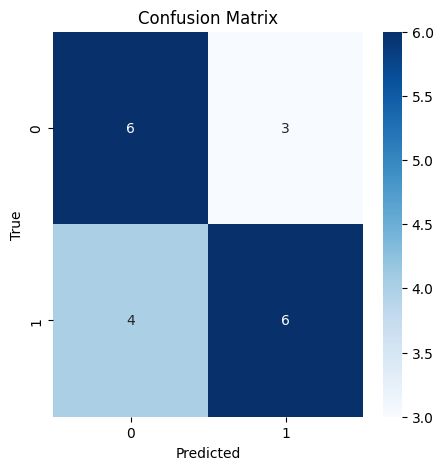

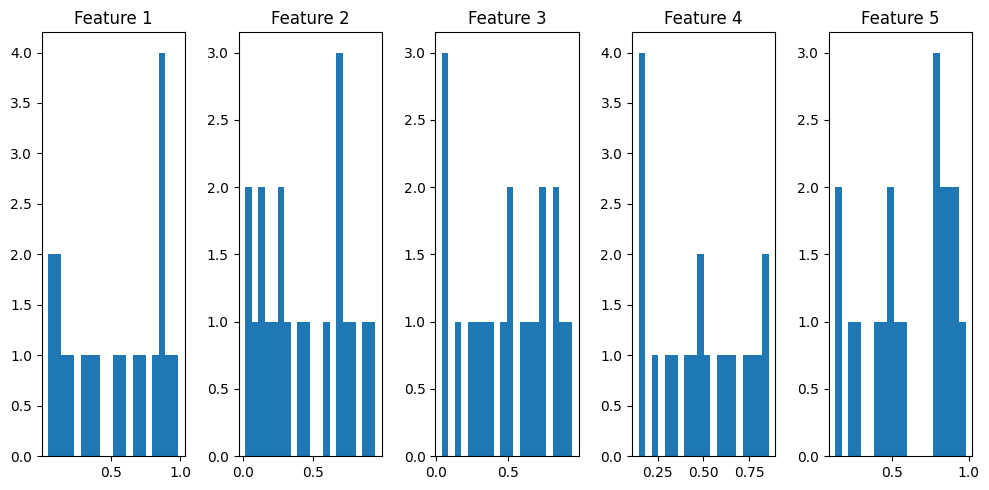

<ipython-input-18-8cfa65e71209>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=features, palette="coolwarm")


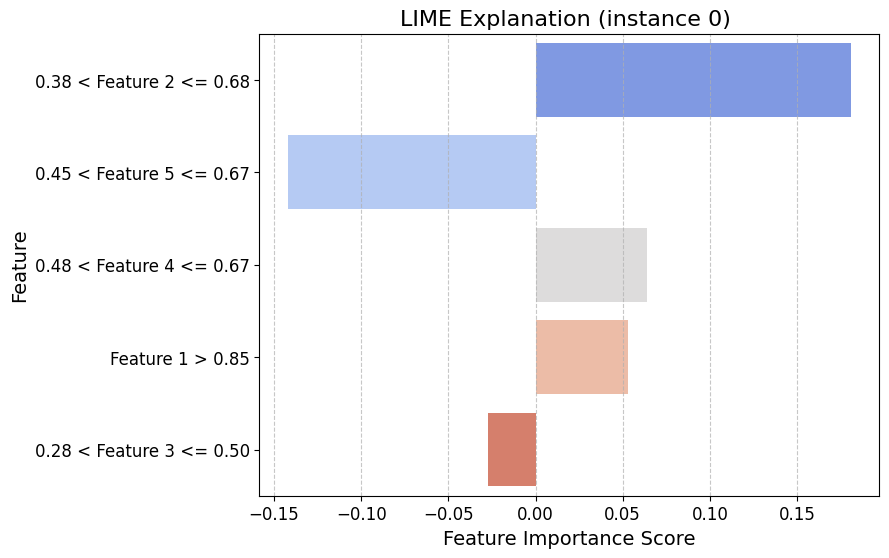

<ipython-input-18-8cfa65e71209>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=features, palette="coolwarm")


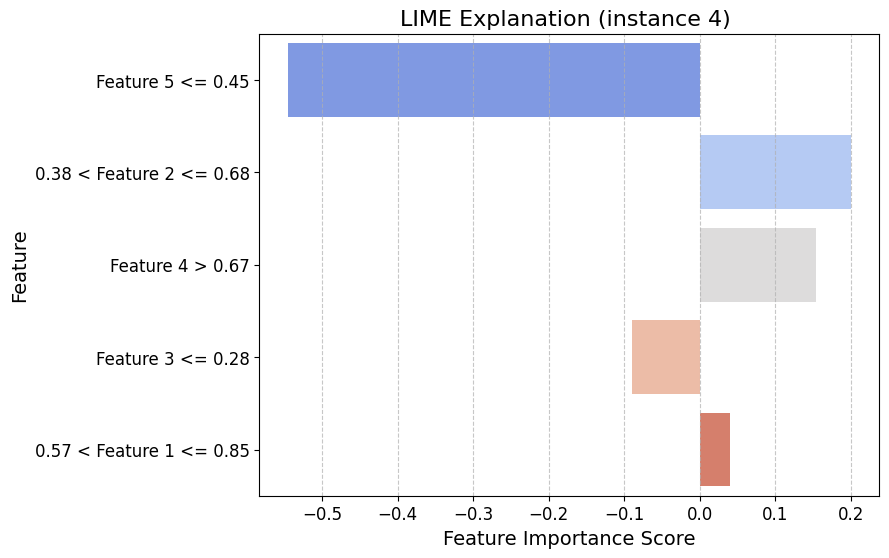

<ipython-input-18-8cfa65e71209>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weights, y=features, palette="coolwarm")


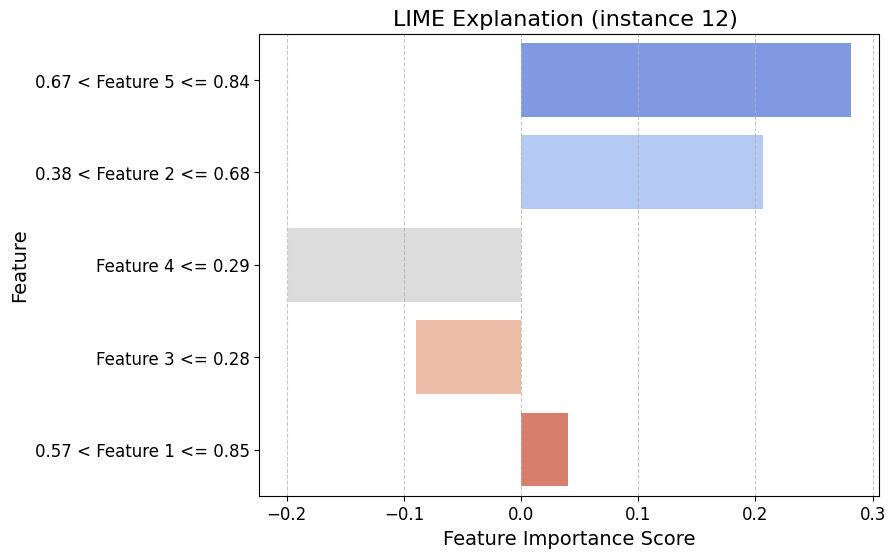

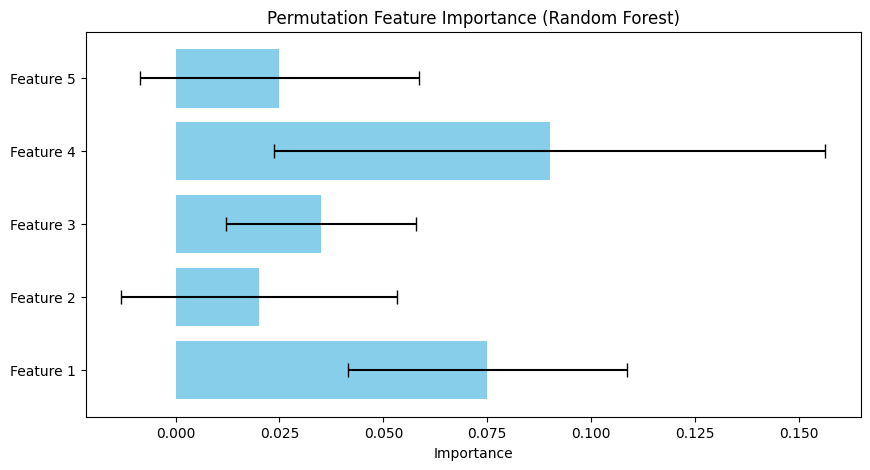

In [ ]:
# --- Imports ---
!pip install lime

import gymnasium as gym
from gymnasium import spaces
import numpy as np
from google.colab import drive
import pandas as pd
import os
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator

# --- Assume your eval_env, best_model, X_val, y_val are loaded already ---

# --- Evaluation Loop ---
obs = eval_env.reset()
done = False
all_obs = []
all_actions = []
all_rewards = []
all_labels = []
current_step = 0
val_labels = y_val

while not done and current_step < len(val_labels):
    action, _ = best_model.predict(obs, deterministic=True)
    next_obs, rewards, dones, infos = eval_env.step(action)
    reward = rewards[0]
    done = dones[0]

    all_obs.append(obs[0])
    all_actions.append(action[0])
    all_rewards.append(reward)
    all_labels.append(val_labels[current_step])
    obs = next_obs
    current_step += 1

# --- Metrics ---
all_obs = np.array(all_obs)
all_actions = np.array(all_actions)
all_rewards = np.array(all_rewards)
all_labels = np.array(all_labels)

accuracy = np.mean(all_actions == all_labels)
print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2%}")
print(f"Total Reward: {np.sum(all_rewards):.2f}")
print(f"Mean Reward: {np.mean(all_rewards):.2f} ± {np.std(all_rewards):.2f}")

# --- Reward Plot ---
def plot_rewards(log_dir, title):
    try:
        data = pd.read_csv(f"{log_dir}/monitor.csv", skiprows=1)
        plt.figure(figsize=(10, 5))
        plt.plot(data['r'])
        plt.xlabel("Episode")
        plt.ylabel("Reward")
        plt.title(title)
        plt.show()
    except Exception as e:
        print(f"Error loading log: {e}")

# --- Confusion Matrix ---
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

log_dir = "./best_model"
plot_rewards(log_dir, "DQN Training Rewards")
plot_confusion_matrix(all_labels, all_actions)

# --- Feature Distribution ---
plt.figure(figsize=(10, 5))
for i in range(X_val.shape[1]):
    plt.subplot(1, X_val.shape[1], i + 1)
    plt.hist(X_val[:, i], bins=20)
    plt.title(f"Feature {i + 1}")
plt.tight_layout()
plt.show()

# --- LIME Visualisation ---
explainer = LimeTabularExplainer(
    training_data=X_val,
    feature_names=[f"Feature {i+1}" for i in range(X_val.shape[1])],
    class_names=[str(i) for i in np.unique(y_val)],
    mode='classification'
)

# Wrapper to make DQN compatible with LIME & PDP
class DQNWrapper(BaseEstimator):
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        actions = []
        for obs in X:
            act, _ = self.model.predict(obs, deterministic=True)
            actions.append(act)
        return np.array(actions)

    def predict_proba(self, X):
        preds = self.predict(X)
        num_classes = len(np.unique(y_val))
        probs = np.zeros((len(preds), num_classes))
        for i, p in enumerate(preds):
            probs[i, int(p)] = 1.0
        return probs

# Apply wrapper
dqn_sklearn_wrapper = DQNWrapper(best_model)

# --- Explain Multiple Instances ---
# Choose multiple instances for explanation, here we'll use 3 instances
instances_to_explain = [0, 4, 12]  # Choose instance indices
lime_feature_importance_all = []

for i in instances_to_explain:
    exp = explainer.explain_instance(
        X_val[i],
        dqn_sklearn_wrapper.predict_proba,
        num_features=5
    )
    lime_values = exp.as_list()  # Extract LIME feature importance values
    features, weights = zip(*lime_values)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=weights, y=features, palette="coolwarm")
#     # Sort by importance
#     sorted_indices = np.argsort(np.abs(importance))[::-1]
#     sorted_features = np.array(features)[sorted_indices]
#     sorted_importance = np.array(importance)[sorted_indices]



# # Define a color palette: Blue for positive contributions, Red for negative contributions
#     cmap = plt.get_cmap("coolwarm")
#     norm = plt.Normalize(vmin=min(sorted_importance), vmax=max(sorted_importance))
#     color_palette = [cmap(norm(i)) for i in sorted_importance]
# # Create a bar plot for LIME explanation
#     plt.figure(figsize=(12, 8))
#     sns.barplot(x=sorted_importance, y=sorted_features, palette=color_palette)

# Labels and title
    plt.xlabel("Feature Importance Score", fontsize=14)
    plt.ylabel("Feature", fontsize=14)
    plt.title(f"LIME Explanation (instance {i}) ", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
    plt.show()
# --- Permutation Feature Importance ---
# Use a RandomForestClassifier for permutation importance
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_val, y_val)

# Calculate permutation importance
result = permutation_importance(
    rf_model,
    X_val,
    y_val,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Visualize Permutation Feature Importance
importance = result.importances_mean
std = result.importances_std

# Plot Feature Importances
plt.figure(figsize=(10, 5))
features = [f"Feature {i+1}" for i in range(X_val.shape[1])]
plt.barh(features, importance, xerr=std, capsize=5, color='skyblue')
plt.xlabel('Importance')
plt.title('Permutation Feature Importance (Random Forest)')
plt.show()


Installing necessary dependencies for the XAI techniques

In [ ]:
!pip install tensorflow numpy matplotlib seaborn lime captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 40.0 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=d8512c6a85507ad273422bb4bd16d8b29381a5287ab3f9a34a594b49b5d055e1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install --upgrade numpy tensorflow

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


Importing the necessary dependencies

In [ ]:
!pip install --upgrade numpy tensorflow scipy
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
!pip install --upgrade numba
# Install required packages
!pip install tensorflow numpy matplotlib seaborn shap lime pandas scikit-plot

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns # Import Seaborn
import pandas as pd
from sklearn.manifold import TSNE
import shap
import lime
import lime.lime_tabular
from matplotlib import pyplot as plt
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

# Instead of using 'seaborn' as a style, import Seaborn
# and it will automatically apply its default style.
#plt.style.use('seaborn')
sns.set_theme()  # This line applies the Seaborn style

%matplotlib inline

Implementtation with